---
---
>># **Machine Learning Homework 2**

>>### MultiLayer Perceptron algorithm implementation

>>Course: Machine Learning

>>Professor: Pasquale Caianiello

>>Student: Dagmawi Abraham Seifu, **Matricola: 261414**

>>Email: dagiabrham44@gmail.com
---
---


#**Brief**
We implement Multilayer perceptron architecture for classification problem. We apply the algorithm on three datasets from UCI repository: breast cancer dataset, letter recognition and wine dataset.




Import all modules from python library that we are going to use to implement MLP architecture

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
%matplotlib inline

scaler = StandardScaler()

Links to the datasets and Train/test ratio

In [0]:
ltr ='Data/Letter recognition/letter-recognition.data'
bcw ='Data/Breast cancer/breast-cancer-wisconsin.data'
wine = 'Data/wine/wine.data'

train_ratio, test_ratio = 0.8, 0.2


# **Dataset 1: Breast Cancer Wisconsin**
Breast cancer database obtained from the University of Wisconsin Hospitals. Some information about the dataset


*   Multivariate Data set
*   Number of rows(instances) - 699 and Number of columns(attributes/features) - 10
*   Class label - 2 for benign, 4 for malignant
*   Source: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)



We first import the breast cancer dataset and replace the missing values with the average.

In [115]:
names=["Clump_Thickness","U_Cellsize","U_CellShape","Marginal_adhesion","Single_ECSS","Bare_nuclei","Blend_chromatin","Normal_chromatin","Mitoses", "Class"]
breast_cancer = pd.read_csv(bcw, names = names)
breast_cancer = breast_cancer.replace('?',4)
for name in names:
  breast_cancer[name] = pd.to_numeric(breast_cancer[name])

breast_cancer.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
breast_cancer.head()

,Clump_Thickness,U_Cellsize,U_CellShape,Marginal_adhesion,Single_ECSS,Bare_nuclei,Blend_chromatin,Normal_chromatin,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


Split the data into training set and test set

In [0]:

X = breast_cancer.drop("Class", axis = 1)
y = breast_cancer['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = train_ratio, test_size = test_ratio, shuffle = True)


Preprocess the data by normalizing it using StandardScaler module so that the MLP algorithm converges in the specified iteration.

In [0]:
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Let us first visualize the dataset by extracting main features using Principal Component Analysis in 2-D. Get the principal components first.

In [118]:
xx = StandardScaler().fit_transform(X.values)
y = breast_cancer[['Class']].reset_index()
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(xx)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf,y], axis = 1)
finalDf.head()


,principal component 1,principal component 2,index,Class
0,-1.463822,-0.100464,1000025,2
1,1.462238,-0.551414,1002945,2
2,-1.586435,-0.070942,1015425,2
3,1.499996,-0.549743,1016277,2
4,-1.338155,-0.080756,1017023,2


Now visualize the dataset

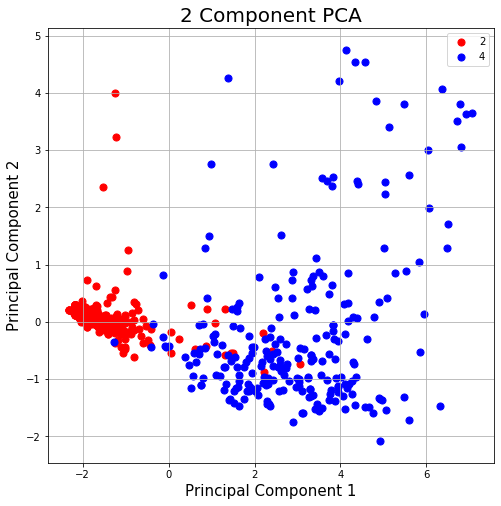

In [119]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


labels = [2, 4]
colors = ['r', 'b']
for label, color in zip(labels,colors):
    indicesToKeep = finalDf['Class'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

Now let us build our MLP modelFirst set the number of iterations, the number of hidden layers and the number of neurons(perceptrons) in each hidden layer. Then use MLPClassifier to predict the outputs. Use the default activation function 'relu' which gives best result than sigmoid(logistic)

In [0]:
iterations = 1000
hidden_layers = [10,10,10] 
mlp = MLPClassifier(hidden_layer_sizes=(hidden_layers), max_iter=iterations)
mlp.fit(X_train_scale, Y_train)
predicted = mlp.predict(X_test_scale)

In [121]:
print(confusion_matrix(Y_test, predicted))

[[86  5]
 [ 1 48]]


In [122]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        91
           4       0.91      0.98      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



We can extract the learning rate (Synaptic plasticity)

In [123]:
mlp.alpha

0.0001

# **Dataset 2: Letter recognition**
A set of character images with different pixel attributes that depict the English alphabet in capital. Some information about the dataset


*   Multivariate Data set
*   Number of rows(instances) - 20000 and Number of columns(attributes/features) - 16
*   Source: https://archive.ics.uci.edu/ml/datasets/Letter+Recognition


Split the dataset into Training set and test set

In [0]:
letter = pd.read_csv(ltr)
X = letter.iloc[:,1:17].values
y = letter.iloc[:,0].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = train_ratio, test_size = test_ratio, shuffle = True)

In [0]:
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Specify the epochs(iterations), play around with the activation functions: logistic, tanh, relu

In [0]:
iterations = 1000
hidden_layers = [10,10,10]
mlp = MLPClassifier(hidden_layer_sizes=(hidden_layers), max_iter=iterations, activation = 'tanh')
mlp.fit(X_train_scale, Y_train)
predicted = mlp.predict(X_test_scale)

In [127]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           A       0.92      0.94      0.93       156
           B       0.78      0.79      0.78       160
           C       0.85      0.87      0.86       148
           D       0.85      0.84      0.84       147
           E       0.85      0.84      0.84       154
           F       0.81      0.78      0.79       141
           G       0.69      0.81      0.74       150
           H       0.72      0.66      0.69       149
           I       0.92      0.86      0.89       167
           J       0.90      0.87      0.89       133
           K       0.79      0.83      0.81       163
           L       0.91      0.90      0.91       141
           M       0.81      0.90      0.85       146
           N       0.89      0.82      0.86       163
           O       0.79      0.78      0.79       141
           P       0.86      0.79      0.82       170
           Q       0.88      0.80      0.84       152
           R       0.68    

# **Dataset 3: Wine Dataset**
A dataset containing results of a chemical analysis of wines. Some info about the dataset


*   Multivariate Data set
*   Number of rows(instances) - 178 and Number of columns(attributes/features) - 13
*   Class label - 1,2,3
*   Attributes are continuous
*   Source: https://archive.ics.uci.edu/ml/datasets/Letter+Recognition

In [0]:
names = ["class", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]
wine = pd.read_csv(wine, names = names)

X = wine.drop("class", axis = 1)
y = wine['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio)


In [0]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Get the principal components in 2-D projection

In [130]:
xx = StandardScaler().fit_transform(X.values)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(xx)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf,y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,class
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


Visualize the dataset in 2-D using the principal components

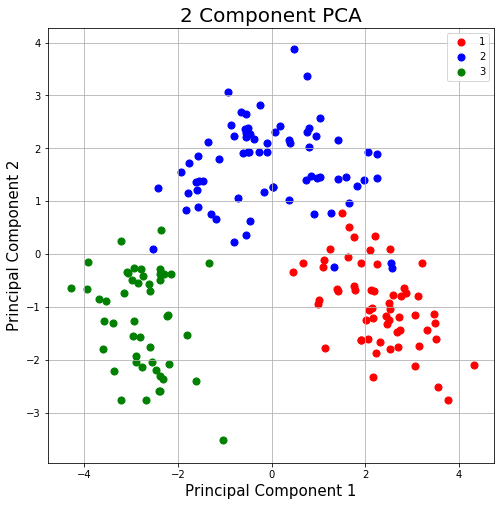

In [131]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


labels = [1,2,3]
colors = ['r', 'b','g']
for label, color in zip(labels,colors):
    indicesToKeep = finalDf['class'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [133]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
predictions = mlp.predict(X_test)

In [135]:
print(confusion_matrix(y_test,predictions))

[[11  0  0]
 [ 2 14  0]
 [ 0  0  9]]


In [136]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        11
           2       1.00      0.88      0.93        16
           3       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.95      0.96      0.95        36
weighted avg       0.95      0.94      0.94        36



# **Conclusion**
As we can see from the simulation, the MLP classifier gives more than 90% accurate prediction except for a few misses and an almost perfect prediction for the wine data set. The accuracy is a lot more than that of KNN prediction which in the previous homework gave us accuracy less that 90%. The accuracy for the letter recognition dataset is 82% which is very good prediction considering the size of the dataset. By playing around the activation function for MLP, we also get different accuracy, which for our dataset the default activation funciton 'relu' (rectified linear unit function), $f(x) = max(0, x)$, was found to be the one which gives best accuracy.

#**References**
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
* https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/
* https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60